# Part 1 Data Preparation

In [29]:
import pandas as pd
import numpy as np

In [9]:
homepage = pd.read_csv("homepage.csv")   
searchpage = pd.read_csv("searchpage.csv")
Payconf =pd.read_csv("payconf.csv")
Users = pd.read_csv("users.csv")
Paypage = pd.read_csv("paypage.csv")

In [10]:
print("Homepage Data:")
print(homepage.head())

Homepage Data:
   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page


In [11]:
print("\nSearch Page Data:")
print(searchpage.head())


Search Page Data:
   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page


In [13]:

print("\nPaywall Page Data:")
print(Paypage.head())


Paywall Page Data:
   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page


In [15]:
print("\nPayment Confirmation Data:")
print(Payconf.head())


Payment Confirmation Data:
   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page


In [17]:
print("\nUsers Data:")
print(Users.head())


Users Data:
   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male


In [23]:
print(Users.columns)
print(homepage.columns)
print(searchpage.columns)
print(Paypage.columns)
print(Payconf.columns)

Index(['user_id', 'date', 'device', 'sex'], dtype='object')
Index(['user_id', 'page'], dtype='object')
Index(['user_id', 'page'], dtype='object')
Index(['user_id', 'page'], dtype='object')
Index(['user_id', 'page'], dtype='object')


In [ ]:
length = len(Users)
k = np.random.binomial(1, 0.495, length)  
Users['group'] = k
Users['group'] = Users['group'].replace(0, 'Control')
Users['group'] = Users['group'].replace(1, 'Test')

In [39]:
df = Users.merge(homepage, on='user_id', how='left', suffixes=('_home', '')) \
          .merge(searchpage, on='user_id', how='left', suffixes=('_search', '')) \
          .merge(Paypage, on='user_id', how='left', suffixes=('_pay', '')) \
          .merge(Payconf, on='user_id', how='left', suffixes=('_conf', ''))


In [44]:
print(df.columns)

Index(['user_id', 'date', 'device', 'sex', 'group', 'page_search', 'page_pay',
       'page_conf', 'page'],
      dtype='object')


In [ ]:
df['converted'] = df['page_pay'].notna().astype(int)


summary = df.groupby('group')['converted'].count()
print(summary)

group
Control    45583
Test       44817
Name: converted, dtype: int64


# ✅ Deliverables for part 1 : A brief description of data preparation and a summary table of users in each group.

# Part 2: Exploratory Data Analysis

In [46]:
import matplotlib.pyplot as plt
conversion_rates = df.groupby('group')['converted'].mean()

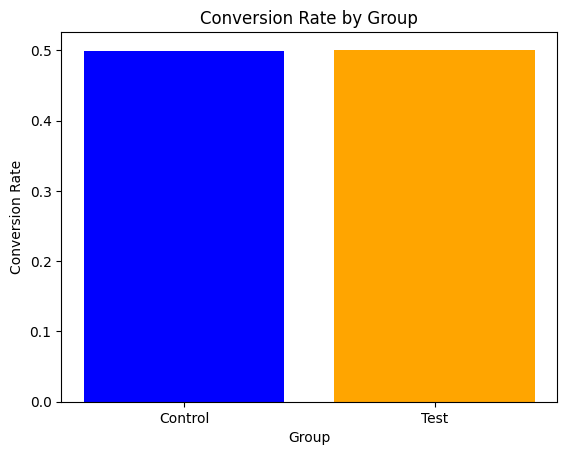

In [47]:
plt.bar(conversion_rates.index, conversion_rates.values, color=['blue', 'orange'])
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Group')
plt.show()


In [48]:
device_counts = df.groupby(['group', 'device'])['converted'].mean().unstack()
print(device_counts)

device    Desktop    Mobile
group                      
Control  0.500446  0.496273
Test     0.499549  0.503823


 # Deliverables for part 2 :
            1 -A bar plot showing conversion rates.
 
            2 -A summary of key insights (e.g., any potential biases in device usage)

# Part 3: Statistical Hypothesis Testing 

# We define our hypotheses as follows:

                    Null Hypothesis (H₀): The conversion rates of the control and treatment groups are equal.
                    Alternative Hypothesis (H₁): The conversion rate of the treatment group is higher than the control group.


# Since we are testing whether the treatment group has a higher conversion rate, this is a one-tailed test.

# I choose the two-proportion z-test because:

                1 - The dependent variable (conversion) is binary (converted = 1, not converted = 0).
                2 - We are comparing proportions from two independent groups (control and treatment).
                3 - The sample size is sufficiently large, allowing us to use the normal approximation for hypothesis testing.

In [49]:
import scipy.stats as stats

# Step 1: Compute Proportions and Sample Sizes

In [50]:
# Conversion rates for Control and Test groups
control_conversions = df[df['group'] == 'Control']['converted'].sum()
test_conversions = df[df['group'] == 'Test']['converted'].sum()

control_count = df[df['group'] == 'Control']['converted'].count()
test_count = df[df['group'] == 'Test']['converted'].count()


In [51]:
# Calculate proportions
p_control = control_conversions / control_count
p_test = test_conversions / test_count

# Calculate pooled proportion
p_pooled = (control_conversions + test_conversions) / (control_count + test_count)


# Step 2: Compute the Test Statistic (Z-score) 

In [54]:
# Standard error of the difference in proportions
se = (p_pooled * (1 - p_pooled) * (1 / control_count + 1 / test_count)) ** 0.5

# Z-score calculation
z = (p_test - p_control) / se

# Step 3: Compute the P-value
Since this is a one-tailed test, we calculate the probability of observing a Z-score as large as or larger than our computed Z-score.
The p-value is obtained from the standard normal distribution.


In [ ]:


# One-tailed p-value (since we are testing if Test group has a higher conversion rate)
p_value = 1 - stats.norm.cdf(z)

# Print results
print(f"Z-score: {z}")
print(f"P-value: {p_value}")

# Compare with alpha (e.g., 0.05)
alpha = 0.05

Z-score: 0.5787361683780776
P-value: 0.28138360368309345


# Step 4: Reporting the Results

In [53]:
if p_value < alpha:
    print("Reject H₀: There is significant evidence that the Test group has a higher conversion rate.")
else:
    print("Fail to reject H₀: There is no significant evidence to suggest the Test group has a higher conversion rate.")


Fail to reject H₀: There is no significant evidence to suggest the Test group has a higher conversion rate.


# Conclusion : 
                * Since the p-value (0.2814) is greater than the significance level 𝛼 =0.05, we fail to reject the null hypothesis (H₀).
                * This means that we do not have enough statistical evidence to conclude that the treatment group’s conversion rate is significantly higher than the control group’s.
                
Final Decision: There is no statistically significant improvement in conversion rates in the treatment group. Further analysis or additional testing may be required to draw stronger conclusions.

# Deliverable for Part 3 : A section detailing your hypothesis, test choice, calculations, and conclusion.

# Part 4: Interpretation and Discussion

 1 - If the p-value is less than the significance level (e.g., 0.05), you reject the null hypothesis and conclude that the Test group has a significantly higher conversion rate than the Control group.
#If the p-value is greater than or equal to the significance level, you fail to reject the null hypothesis, meaning you don't have enough evidence to claim that the Test group has a higher conversion rate.

The p-value obtained from the hypothesis test is 0.2814 (approximately 28.14%). In most A/B testing scenarios, a significance level (α) of 0.05 (5%) is used as the threshold for rejecting the null hypothesis (H₀).

Since 0.2814 > 0.05, we fail to reject the null hypothesis (H₀). This means that the observed difference in conversion rates between the Control and Test groups is not statistically significant. There is no strong evidence to suggest that the Test group has a higher conversion rate than the Control group.

# Is it practically significant?
Even if a difference were statistically significant, it is important to assess whether it is large enough to be meaningful in a business context. In this case, since the difference is not statistically significant, it is unlikely to be practically significant.

If the Test group’s conversion rate is only slightly higher but does not lead to a meaningful increase in revenue, engagement, or other key business metrics, implementing changes based on this test may not be justified.

# Discussion of Potential Limitations

# Could randomness have been violated?
Random assignment is essential to ensure that the results are not biased by external factors. If there was an issue with how users were assigned to the Test and Control groups (e.g., biased sampling, non-random selection), it could affect the validity of the results.

Solution: Ensure proper randomization when assigning users to groups, possibly using stratified randomization to balance key characteristics (e.g., device type, geographic location).

# Are there confounding variables (e.g., device type, time of day)?
Confounding variables are factors that may have influenced conversion rates independently of the experimental change. For example:

                    1 -Different device types (mobile vs. desktop) could lead to different conversion behaviors.
                    2 -Time of day or day of the week could affect user behavior.
                    3 -User demographics (age, region, previous interactions with the platform) might have played a role.

Solution: Conduct a more granular analysis by segmenting users based on device type, time of day, or other relevant characteristics to identify potential patterns.

# Are there network effects?
If users influence each other’s behavior (e.g., through word of mouth, social media, or referral programs), then the observed conversion rates might not be independent. If the Test group interacted more with each other than the Control group did, this could have affected the results.
#Solution: Try to isolate the groups to minimize the possibility of indirect influence.




# Suggest one additional analysis or experiment to improve confidence in your  Findings.

# Increase the Sample Size: 
             The current sample size may not be large enough to detect small but meaningful differences. A larger sample size would reduce variability and improve the statistical power of the test, making it easier to identify real effects.

# Conduct a More Granular Analysis
            Instead of only comparing overall conversion rates, we can:
                1 - Analyze conversions by device type, region, or other user attributes.
                2 - Investigate time-based trends to see if conversion rates vary by time of day or day of the week.

# Run a Longer Experiment:      
             If external factors (e.g., seasonal effects, special promotions) influenced the test period, running the experiment for a longer duration could help ensure that results are more representative of typical user behavior.

# Use an Alternative Statistical Test:
            Since the Z-test assumes a normal distribution, if the data is skewed or does not meet normality assumptions, using a non-parametric test (e.g., the Mann-Whitney U test) or Bayesian analysis might provide more insights.

# Part 5 Recommendations

Since the p-value is greater than 0.05, we do not have enough evidence to conclude that the treatment paywall improves conversion rates.

There are three options:

            1 -Adopt the treatment paywall – only if there are non-statistical reasons (e.g., user experience improvements).
            2 -mStick with the control – since there is no proven benefit to switching.
            3 - Gather more data – if the sample size was small or external factors may have influenced results.
            
Recommendation: Given the current analysis, we recommend gathering more data before making a final decision. The lack of statistical significance suggests that the treatment paywall does not outperform the control, but external factors (e.g., different user behaviors, seasonal trends) could influence results. A larger sample size or additional A/B tests could provide clearer insights.

# My recommendation to gather more data is based on the following evidence:

1 - Lack of Statistical Significance:

            * The p-value (0.2814) is much higher than the significance level (α = 0.05), meaning we fail to reject the null hypothesis.
            * This suggests that the observed difference in conversion rates between the control and treatment groups could be due to random variation rather than a real effect.

2 -Small Effect Size and Practical Significance:

            * Even if there were a small difference in conversion rates, it may not be practically meaningful.
            * Business decisions should be driven not just by statistical results but by whether the change has a meaningful impact on revenue or user experience.

3 -Potential Data Limitations:

            * If the sample size is not large enough, the test may lack statistical power to detect a real difference.
            * External factors, such as seasonality, marketing campaigns, or user demographics, may have influenced the results, requiring further investigation.

4 -Alternative Hypothesis Not Supported:

            * The test was designed to determine whether the treatment paywall leads to higher conversion rates. Since we failed to find evidence supporting this, switching to the new paywall could introduce unnecessary risk without a clear benefit.
            
# My Recommendation :

            * Running the experiment for a longer period or increasing the sample size.
            * Segmenting data by device type, geographic region, and user behavior to check for confounding factors.
            * Exploring qualitative feedback from users to understand why conversions did not improve.

Until stronger evidence emerges, it is premature to adopt the treatment paywall, and we should continue testing before making a final decision.

                                                                                                Thank you
                                                                                                Harpreet Kaur
                                                                                                Student id -131730